# Geospatial Data Analysis Lab: Steel Plants Dataset


**(15/10/2025) Learning Objectives:**
- Perform exploratory data analysis (EDA) on geospatial datasets
- Visualize geospatial data using interactive maps with Plotly
- Merge environmental data with asset locations
- Aggregate data at the company level
- Integrate geospatial visualizations into a Streamlit dashboard

---


## Part 1: Setup and Data Loading

Import the necessary libraries and load the steel plants dataset.


In [1]:
# Import required libraries
# - pandas for data manipulation
# - numpy for numerical operations
# - plotly.express and plotly.graph_objects for interactive visualizations
# - Any other libraries you might need

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [2]:
# Load the steel plants dataset
# Expected columns: plant_id, plant_name, company, latitude, longitude, capacity, year_built, etc.

df = pd.read_excel('Plant-level-data-Global-Iron-and-Steel-Tracker-September-2025-V1.xlsx',sheet_name='Plant data')
df[['lat', 'lon']] = df['Coordinates'].str.split(',', expand=True)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
print(df.columns)

Index(['Plant ID', 'Plant name (English)', 'Plant name (other language)',
       'Other plant names (English)', 'Other plant names (other language)',
       'Owner', 'Owner (other language)', 'Owner GEM ID', 'Owner PermID',
       'SOE Status', 'Parent', 'Parent GEM ID', 'Parent PermID',
       'Location address', 'Municipality', 'Subnational unit (province/state)',
       'Country/Area', 'Region', 'Other language location address',
       'Coordinates', 'Coordinate accuracy', 'GEM wiki page',
       'Plant age (years)', 'Announced date', 'Construction date',
       'Start date', 'Pre-retirement announcement date', 'Idled date',
       'Retired date', 'Ferronickel capacity (ttpa)',
       'Sinter plant capacity (ttpa)', 'Coking plant capacity (ttpa)',
       'Pelletizing plant capacity (ttpa)', 'Category steel product',
       'Steel products', 'Steel sector end users', 'Workforce size',
       'ISO 14001', 'ISO 50001', 'ResponsibleSteel Certification',
       'Main production equipmen

---
## Part 2: Exploratory Data Analysis (15 minutes)

Answer the following questions through your analysis:


### Question 1: Data Overview
**Task:** Display basic information about the dataset.
- How many steel plants are in the dataset?
- What are the column names and data types?
- Are there any missing values?


In [3]:
# Display dataset shape

df.shape

(1209, 46)

In [4]:
# Display column information and data types

df.dtypes

Plant ID                               object
Plant name (English)                   object
Plant name (other language)            object
Other plant names (English)            object
Other plant names (other language)     object
Owner                                  object
Owner (other language)                 object
Owner GEM ID                           object
Owner PermID                           object
SOE Status                             object
Parent                                 object
Parent GEM ID                          object
Parent PermID                          object
Location address                       object
Municipality                           object
Subnational unit (province/state)      object
Country/Area                           object
Region                                 object
Other language location address        object
Coordinates                            object
Coordinate accuracy                    object
GEM wiki page                     

In [5]:
# Check for missing values
re_df = df.isnull().sum()
re_df


Plant ID                                 0
Plant name (English)                     0
Plant name (other language)            512
Other plant names (English)            507
Other plant names (other language)     922
Owner                                    0
Owner (other language)                 655
Owner GEM ID                             0
Owner PermID                             0
SOE Status                            1007
Parent                                   0
Parent GEM ID                            0
Parent PermID                            0
Location address                         0
Municipality                             0
Subnational unit (province/state)        0
Country/Area                             0
Region                                   0
Other language location address        764
Coordinates                              0
Coordinate accuracy                      1
GEM wiki page                            0
Plant age (years)                       67
Announced d

### Question 2: Statistical Summary
**Task:** Generate descriptive statistics for numerical columns.
- What is the average plant capacity?
- What is the range of latitudes and longitudes?
- What is the distribution of plant ages?


In [6]:
#loading new dataframe
df1 = pd.read_excel('Plant-level-data-Global-Iron-and-Steel-Tracker-September-2025-V1.xlsx',sheet_name='Plant capacities and status')
df1 =df1[['Plant ID','Country/Area','Nominal crude steel capacity (ttpa)','Status']].dropna().drop_duplicates()
df1  =df1[df1['Status']=='operating']
df1 = df1[df1['Nominal crude steel capacity (ttpa)']!='>0']
df1 = df1[df1['Nominal crude steel capacity (ttpa)']!='1']
df1


,Plant ID,Country/Area,Nominal crude steel capacity (ttpa),Status
1,P100000120439,Algeria,2200,operating
4,P100000121198,Algeria,800,operating
5,P100000120440,Algeria,2150,operating
7,P100000120441,Algeria,6200,operating
8,P100000120005,Angola,500,operating
...,...,...,...,...
1734,P100001045592,Vietnam,552,operating
1735,P100000121023,Vietnam,500,operating
1736,P100001045578,Vietnam,1200,operating
1738,P100000121021,Vietnam,550,operating


In [7]:
# What is the average plant capacity ?
## Changing the Nominal crude steel capacity (ttpa) from string to numerical values
capacity_list = []
for el in df1['Nominal crude steel capacity (ttpa)']:
    capacity_list.append(int(el))
df1['Nominal crude steel capacity (ttpa)']=capacity_list
## computing the average
print(f"the average plant capacity is {np.average(capacity_list)}")


the average plant capacity is 2459.651533742331


In [8]:
# What is the range of latitudes and longitudes?
## Merging of the dataframe containing the coordinates from the plant data sheet and the capacity data.
a = df[['Plant ID','Parent GEM ID','Coordinates','Plant age (years)']].dropna().drop_duplicates(subset=('Plant ID'))
merged_df = pd.merge(df1,a, on='Plant ID', how='inner')
## Spliting the coordinates into floats for lat and long
def spiliting_coordinates(coordinates):
    lat= []
    lon=[]
    i=0
    passed = False 
    while i <len(coordinates):
        if passed ==False and coordinates[i]!=',':
            lat.append(coordinates[i])
        if passed == True and coordinates[i]!=',':
            lon.append(coordinates[i])
        if coordinates[i]==',':
            passed=True
        i+=1
    return float(''.join(lat)), float(''.join(lon))
## computing the different ranges
lat = []
lon = []
for coor in merged_df['Coordinates']:
    la,lo = spiliting_coordinates(coor)
    lat.append(la)
    lon.append(lo)
print(f"the range of latitudes is minimim latitude:{min(lat)},maximum latitude:{max(lat)} ")
print(f"the range of longitudes is minimim longitude:{min(lon)},maximum longitude:{max(lon)} ")


the range of latitudes is minimim latitude:-37.831379,maximum latitude:66.311519 
the range of longitudes is minimim longitude:-123.163599,maximum longitude:150.886191 


In [38]:
merged_df

,Plant ID,Country/Area,Nominal crude steel capacity (ttpa),Status,Parent GEM ID,Coordinates,Plant age (years)
0,P100000120439,Algeria,2200,operating,E100000000840 [49.0%]; E100000132388 [5.0%]; E...,"36.7539610, 6.2444200",8.00
1,P100000121198,Algeria,800,operating,E100001012196 [100.0%],"35.4785800, -0.6213900",NaN
2,P100000120440,Algeria,2150,operating,E100001000960 [100.0%],"36.7959240, 7.7076330",56.00
3,P100000120441,Algeria,6200,operating,E100001000709,"35.7709120, -0.2630310",12.00
4,P100000120005,Angola,500,operating,E100002003632,"-8.5824000, 13.4052710",10.00
...,...,...,...,...,...,...,...
810,P100001045592,Vietnam,552,operating,E100000130707 [73.8%]; E100001012496 [20.0%]; ...,"20.946428, 106.025454",23.00
811,P100000121023,Vietnam,500,operating,E100000130707 [45.0%]; E100000130925 [40.0%]; ...,"10.6014230, 107.0406790",29.69
812,P100001045578,Vietnam,1200,operating,E100002008272 [100.0%],"10.6368350, 106.5175950",18.00
813,P100000121021,Vietnam,550,operating,E100000130925,"10.5765970, 107.0289950",20.00


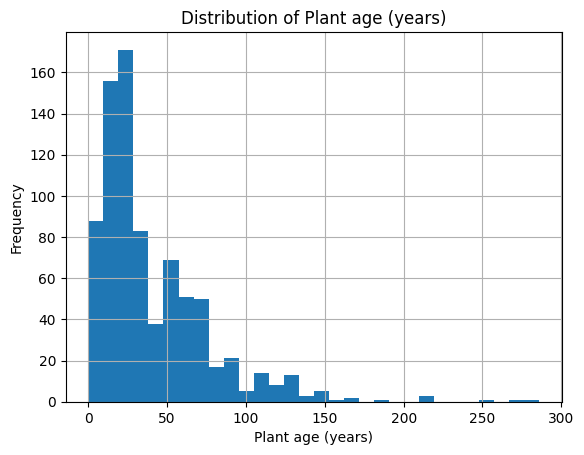

In [9]:
#What is the distribution of plant ages?
merged_df['Plant age (years)'] = pd.to_numeric(merged_df['Plant age (years)'], errors='coerce')
merged_df['Plant age (years)'].hist(bins=30)
plt.xlabel('Plant age (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Plant age (years)')
plt.show()


### Question 3: Geographic Distribution
**Task:** Analyze the geographic distribution of steel plants.
- Which countries/regions have the most steel plants?
- What is the distribution of plants by company?


In [10]:
# Count plants by country/region
df1.groupby('Country/Area')['Plant ID'].count()




Country/Area
Algeria           4
Angola            1
Argentina         4
Australia         3
Austria           2
                 ..
United States    67
Uzbekistan        1
Venezuela         1
Vietnam          20
Zimbabwe          1
Name: Plant ID, Length: 77, dtype: int64

In [11]:
# Count plants by company
## make a list of the owner of a plant and the share it has in the plant.
liste = a['Parent GEM ID']
deuxieme_liste = a['Plant ID']
liste_clean = liste.dropna().reset_index(drop=True)
deuxieme_clean = deuxieme_liste.dropna().reset_index(drop=True)
rez = []


i = 0
while i < len(liste_clean):
    el = liste_clean.iloc[i]
    petite_liste = [x.strip() for x in el.split(';')]
    units = len(petite_liste)

    j = 0
    while j < len(petite_liste):
        sub = petite_liste[j]
        if '[' in sub and ']' in sub:
            try:
                id_part = sub.split('[')[0].strip()
                perc_part = sub.split('[')[1].replace(']', '').replace('%', '').strip()
                rez.append([deuxieme_clean.iloc[i], id_part, float(perc_part)])
            except Exception as e:
                print(f"Error parsing {sub}: {e}")
        else:
            if units == 1:
                rez.append([deuxieme_clean.iloc[i], sub, 100.0])
            else:
                rez.append([deuxieme_clean.iloc[i], sub, 100.0 / units])
        j += 1

    i += 1
print(rez) 

own_df= pd.DataFrame(rez,columns = ['Plant ID','Parent GEM ID','share'])
own_df['share']=own_df['share']/100


## Make a dictionnary that contains the different owners and the sum of all their shares in plants?
keys = []
for ell in rez:
    keys.append(ell[1])

dico = dict.fromkeys(keys, 0)

for le in rez:
    dico[le[1]] += le[2] / 100


owner_df = pd.DataFrame(list(dico.items()), columns=['Parent GEM ID', 'plant owned'])

owner_df

[['P100000120004', 'E100000130992', 100.0], ['P100000120439', 'E100000000840', 49.0], ['P100000120439', 'E100000132388', 5.0], ['P100000120439', 'E100001000960', 33.333333333333336], ['P100000120442', 'E100001010275', 100.0], ['P100000121198', 'E100001012196', 100.0], ['P100000120440', 'E100001000960', 100.0], ['P100000120441', 'E100001000709', 100.0], ['P100000120005', 'E100002003632', 100.0], ['P100000121215', 'E100001012406', 50.0], ['P100000121215', 'E100001012405', 50.0], ['P100000120006', 'E100000000687', 100.0], ['P100000120009', 'E100001010270', 98.1], ['P100000120007', 'E100000000692', 100.0], ['P100000120008', 'E100000130688', 100.0], ['P100000120012', 'E100000130689', 100.0], ['P100001043035', 'E100001011127', 100.0], ['P100000120014', 'E100001000556', 100.0], ['P100000120013', 'E100001000556', 100.0], ['P100000120015', 'E100001000556', 100.0], ['P100000120011', 'E100000000031', 100.0], ['P100000120010', 'E100000000031', 100.0], ['P100000121043', 'E100000131003', 50.0], ['P1

,Parent GEM ID,plant owned
0,E100000130992,1.000000
1,E100000000840,2.022000
2,E100000132388,19.098333
3,E100001000960,1.333333
4,E100001010275,1.000000
...,...,...
987,E100000131144,3.000000
988,E100002008298,1.000000
989,E100000130791,0.060000
990,E100002008272,1.000000


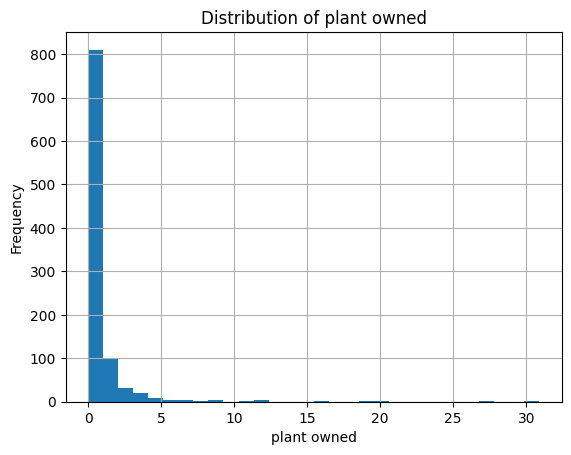

In [12]:
# Why are there more owners than plants, because a lot of company do not have a large amount of shares in a plant.

owner_df['plant owned'].hist(bins=30)
plt.xlabel('plant owned')
plt.ylabel('Frequency')
plt.title('Distribution of plant owned')
plt.show()

### Question 4: Capacity Analysis
**Task:** Analyze the capacity distribution.
- What is the total global steel production capacity?
- Which companies have the highest total capacity?
- How does capacity vary by region?


In [13]:
# Calculate total capacity
print(f"the total capacity is {np.sum(capacity_list)}")


the total capacity is 2004616


In [14]:
#Which companies have the highest total capacity?
region_df = df[['Plant ID','Region']]
big_merge = pd.merge(region_df,df1,on='Plant ID',how='inner')
big_merge = pd.merge(big_merge,own_df,on='Plant ID',how='inner')
big_merge['capacity/parent']=big_merge['Nominal crude steel capacity (ttpa)']*big_merge['share']
capa_parent = ( big_merge.groupby('Parent GEM ID', as_index=False)['capacity/parent'].sum().sort_values(by='capacity/parent', ascending=False))
capa_parent

,Parent GEM ID,capacity/parent
19,E100000000652,64206.600
23,E100000000687,57703.333
51,E100000122571,52834.200
27,E100000000953,44107.500
543,E100000132388,38127.892
...,...,...
391,E100000129163,0.000
390,E100000129162,0.000
389,E100000129125,0.000
113,E100000124399,0.000


In [15]:
#How does capacity vary by region?
capa_region =  ( big_merge.groupby('Region', as_index=False)['capacity/parent'].sum().sort_values(by='capacity/parent', ascending=False))
capa_region

,Region,capacity/parent
1,Asia Pacific,1.382850e+06
4,Europe,2.050146e+05
6,North America,1.472878e+05
3,Eurasia,9.256407e+04
5,Middle East,7.485907e+04
2,Central & South America,5.569568e+04
0,Africa,4.085133e+04


---
## Part 3: Geospatial Visualization with Plotly (15 minutes)

Create interactive maps to visualize the steel plants' locations and characteristics.


### Exercise 1: Basic Scatter Map
**Task:** Create a scatter map showing all steel plant locations.
- Use latitude and longitude for positioning
- Color points by country or region
- Add hover information showing plant name, company, and capacity


In [16]:
# Create a scatter_geo or scatter_mapbox plot
# Hint: Use plotly.express.scatter_geo() or scatter_mapbox()


plotly_df = pd.read_excel('Plant-level-data-Global-Iron-and-Steel-Tracker-September-2025-V1.xlsx', sheet_name='Plant data')
plotly_df[['lat', 'lon']] = (
    plotly_df['Coordinates']
    .dropna()
    .apply(lambda x: pd.Series([float(x.split(',')[0]), float(x.split(',')[1])]))
)
plotly_df.columns

Index(['Plant ID', 'Plant name (English)', 'Plant name (other language)',
       'Other plant names (English)', 'Other plant names (other language)',
       'Owner', 'Owner (other language)', 'Owner GEM ID', 'Owner PermID',
       'SOE Status', 'Parent', 'Parent GEM ID', 'Parent PermID',
       'Location address', 'Municipality', 'Subnational unit (province/state)',
       'Country/Area', 'Region', 'Other language location address',
       'Coordinates', 'Coordinate accuracy', 'GEM wiki page',
       'Plant age (years)', 'Announced date', 'Construction date',
       'Start date', 'Pre-retirement announcement date', 'Idled date',
       'Retired date', 'Ferronickel capacity (ttpa)',
       'Sinter plant capacity (ttpa)', 'Coking plant capacity (ttpa)',
       'Pelletizing plant capacity (ttpa)', 'Category steel product',
       'Steel products', 'Steel sector end users', 'Workforce size',
       'ISO 14001', 'ISO 50001', 'ResponsibleSteel Certification',
       'Main production equipmen

In [17]:
import plotly.express as px

color_col = 'Country/Area' if 'Country/Area' in df.columns else 'Region'
hover_name = 'Plant name (English)'
hover_data = ['Owner', 'Ferronickel capacity (ttpa)','Pelletizing plant capacity (ttpa)','Sinter plant capacity (ttpa)','Coking plant capacity (ttpa)']  # info shown in hover

fig = px.scatter_geo(
    plotly_df,
    lat='lat',
    lon='lon',
    color=color_col,
    hover_name=hover_name,
    hover_data=hover_data
)
fig.show()



### Exercise 2: Sized Markers by Capacity
**Task:** Create a map where marker size represents plant capacity.
- Larger markers for higher capacity plants
- Color by company
- Include interactive hover details


In [30]:
# Create scatter map with size parameter based on capacity

import pandas as pd
import plotly.express as px

capacity_cols = [
    'Ferronickel capacity (ttpa)',
    'Sinter plant capacity (ttpa)',
    'Coking plant capacity (ttpa)',
    'Pelletizing plant capacity (ttpa)'
]
for col in capacity_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total capacity (ttpa)'] = df[capacity_cols].sum(axis=1, skipna=True)

hover_name = 'Plant name (English)'
hover_data = {
    'Owner': True,
    'Total capacity (ttpa)': True,
    'Country/Area': True,
    'Region': True,
    'Municipality': True
}

fig = px.scatter_geo(
    df,
    lat='lat',
    lon='lon',
    size='Total capacity (ttpa)',    # marker size = total capacity
    color='Owner',                   # color by company
    hover_name=hover_name,
    hover_data=hover_data,
    projection='natural earth',
    title='Steel Plants — Marker Size by Capacity, Color by Company'
)



fig.show()

### Exercise 3: Density Heatmap
**Task:** Create a density map showing concentration of steel plants.
- Use Plotly's density_mapbox to show clustering
- Identify regions with high plant density


In [31]:
# Create density heatmap
# Hint: Use plotly.express.density_mapbox()

df = df.dropna(subset=['lat', 'lon'])
fig = px.density_mapbox(
    df,
    lat='lat',
    lon='lon',
    z='Total capacity (ttpa)',       # weight the heatmap by capacity
    radius=15,                       # radius in pixels (increase for more smoothing)
    center=dict(lat=20, lon=0),      # roughly center the world
    zoom=1,                          # zoomed out to see global clusters
    mapbox_style='carto-positron',   # nice light basemap
    title='Global Density of Steel Plants (Weighted by Capacity)'
)
fig.show()

C:\Users\cestm\AppData\Local\Temp\ipykernel_26872\2121453790.py:5: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



---
## Part 4: Merging Environmental Data with Assets

Integrate environmental data (e.g., air quality, emissions, proximity to water sources) with steel plant locations.


### Exercise 1: Load Environmental Data
**Task:** Load the environmental dataset and inspect it.

- [Litpop database](https://www.research-collection.ethz.ch/entities/researchdata/12dcfc4f-9d03-463a-8d6b-76c0dc73cdc8)

- Expected columns: location_id, latitude, longitude, population density, activity etc.


In [20]:
# Load environmental data



In [21]:
# Inspect environmental data



### Exercise 2: Spatial Join or Nearest Neighbor Matching
**Task:** Merge environmental data with steel plants based on geographic proximity.
- Use nearest neighbor matching or spatial join
- Consider using geopandas for distance calculations
- Match each plant to the nearest environmental monitoring station


In [22]:
# Calculate distances or perform spatial join
# Hint: You might calculate haversine distance or use a spatial library



In [23]:
# Merge datasets



### Exercise 3: Visualize Merged Data
**Task:** Create a map showing steel plants colored by environmental metrics.
- Color plants by air quality index or other environmental indicators
- Size by capacity
- Add hover details with both plant and environmental information


In [24]:
# Create visualization of merged data



---
## Part 5: Company-Level Aggregation

Aggregate data at the company level to analyze corporate footprints.


### Exercise 1: Aggregate Metrics by Company
**Task:** Group plants by company and calculate aggregate metrics.
- Total capacity per company
- Number of plants per company
- Average environmental metrics per company
- Geographic spread (e.g., number of countries)


In [33]:
# Group by company and aggregate

env_cols = ['ISO 14001', 'ISO 50001', 'ResponsibleSteel Certification']
for col in env_cols:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if pd.notna(x) and str(x).strip().lower() not in ['no', '0', 'false'] else 0)

grouped = df.groupby('Owner').agg(
    Total_capacity=('Total capacity (ttpa)', 'sum'),
    Number_of_plants=('Owner', 'count'),
    Avg_ISO_14001=('ISO 14001', 'mean'),
    Avg_ISO_50001=('ISO 50001', 'mean'),
    Avg_ResponsibleSteel=('ResponsibleSteel Certification', 'mean'),
    Countries_operating=('Country/Area', pd.Series.nunique)
).reset_index()

grouped = grouped.sort_values(by='Total_capacity', ascending=False)
grouped

,Owner,Total_capacity,Number_of_plants,Avg_ISO_14001,Avg_ISO_50001,Avg_ResponsibleSteel,Countries_operating
432,JSW Steel Ltd,50935.0,6,1.0,1.0,0.0,1
787,Steel Authority of India Ltd,43591.0,7,1.0,1.0,0.0,1
468,Jindal Steel Odisha Ltd,42670.0,1,1.0,1.0,0.0,1
467,Jindal Steel & Power Ltd,39710.0,5,1.0,1.0,0.0,1
680,Rungta Mines Ltd,34955.0,5,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...
370,Henan Changtai Stainless Steel Plate Co Ltd,0.0,1,1.0,1.0,0.0,1
371,Henan Fengbao SPECIAL Steel Co Ltd,0.0,1,1.0,1.0,0.0,1
372,Henan Jiyuan Iron & Steel (Group) Co Ltd,0.0,1,1.0,1.0,0.0,1
373,Henan Xinjinhui Stainless Steel Industry Co Ltd,0.0,1,1.0,1.0,0.0,1


### Exercise 2: Company Headquarters or Centroid
**Task:** Calculate a representative location for each company.
- Option 1: Use the centroid of all plant locations
- Option 2: Use the location of the largest plant
- Option 3: Assign actual headquarters coordinates


In [35]:
# Calculate company representative locations
centroid_df = df.groupby('Owner').agg(
    centroid_lat=('lat', 'mean'),
    centroid_lon=('lon', 'mean'),
    total_capacity=('Total capacity (ttpa)', 'sum'),
    number_of_plants=('Owner', 'count')
).reset_index()

centroid_df


,Owner,centroid_lat,centroid_lon,total_capacity,number_of_plants
0,A. Finkl & Sons Corp,41.724915,-87.589968,0.0,1
1,ABA Çelik Demir LŞ,36.747413,36.217330,0.0,1
2,AFV Acciaierie Beltrame SpA,45.522097,11.499295,0.0,1
3,AG Siderurgica Balboa SA,38.326405,-6.767326,0.0,1
4,AG der Dillinger Hüttenwerke AG,49.353884,6.746603,0.0,1
...,...,...,...,...,...
983,Zunyi Changling Special Steel Co Ltd,27.614947,106.949752,0.0,1
984,Zunyi County Fuxin Iron & Steel Product Co Ltd,27.591697,106.815453,0.0,1
985,unknown,27.571389,89.485054,0.0,3
986,Çebitaş Demir Çelik Endüstrisi AŞ,38.740740,26.951743,0.0,1


### Exercise 3: Visualize Company-Level Data
**Task:** Create a map showing companies with aggregated metrics.
- Show one marker per company at the representative location
- Size by total capacity
- Color by average environmental impact
- Hover information with company summary statistics


In [36]:
# Create company-level visualization

agg_df = df.groupby('Owner').agg(
    total_capacity=('Total capacity (ttpa)', 'sum'),
    num_countries=('Country/Area', pd.Series.nunique),
    avg_iso14001=('ISO 14001', 'mean'),
    avg_iso50001=('ISO 50001', 'mean'),
    avg_responsible=('ResponsibleSteel Certification', 'mean'),
).reset_index()
agg_df = agg_df.merge(centroid_df[['Owner', 'centroid_lat', 'centroid_lon']], on='Owner', how='left')
agg_df


,Owner,total_capacity,num_countries,avg_iso14001,avg_iso50001,avg_responsible,centroid_lat,centroid_lon
0,A. Finkl & Sons Corp,0.0,1,1.0,1.0,0.0,41.724915,-87.589968
1,ABA Çelik Demir LŞ,0.0,1,1.0,1.0,0.0,36.747413,36.217330
2,AFV Acciaierie Beltrame SpA,0.0,1,1.0,1.0,0.0,45.522097,11.499295
3,AG Siderurgica Balboa SA,0.0,1,1.0,1.0,0.0,38.326405,-6.767326
4,AG der Dillinger Hüttenwerke AG,0.0,1,1.0,1.0,1.0,49.353884,6.746603
...,...,...,...,...,...,...,...,...
983,Zunyi Changling Special Steel Co Ltd,0.0,1,1.0,1.0,0.0,27.614947,106.949752
984,Zunyi County Fuxin Iron & Steel Product Co Ltd,0.0,1,1.0,1.0,0.0,27.591697,106.815453
985,unknown,0.0,3,1.0,1.0,0.0,27.571389,89.485054
986,Çebitaş Demir Çelik Endüstrisi AŞ,0.0,1,1.0,1.0,0.0,38.740740,26.951743


In [37]:
agg_df['env_score'] = agg_df[['avg_iso14001','avg_iso50001','avg_responsible']].mean(axis=1)

hover_name = 'Owner'
hover_data = {
    'total_capacity': ':.0f',
    'num_countries': True,
    'avg_iso14001': ':.2f',
    'avg_iso50001': ':.2f',
    'avg_responsible': ':.2f',
    'env_score': ':.2f'
}

fig = px.scatter_geo(
    agg_df,
    lat='centroid_lat',
    lon='centroid_lon',
    size='total_capacity',
    color='env_score',
    hover_name='Owner',
    hover_data=hover_data,
    projection='natural earth',
    color_continuous_scale='YlGn',
    title='Steel Companies — Aggregated Metrics Map'
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='black')))
fig.update_layout(
    coloraxis_colorbar=dict(title="Env. Score (0–1)"),
    geo=dict(showland=True, landcolor='lightgray'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

---
## Part 6: Streamlit Dashboard Integration

Prepare your visualizations for deployment in a Streamlit dashboard.


### Exercise 1: Create Dashboard Script Structure
**Task:** Create a Streamlit app file (`dashboard.py`) with the following structure:

```python
# Import streamlit and other necessary libraries

# Set page configuration

# Title and description

# Sidebar for filters
# - Company selector
# - Region/country filter
# - Capacity range slider

# Main content area
# - KPI metrics (total plants, total capacity, etc.)
# - Interactive map
# - Data table

# Footer with data sources and notes
```


### Exercise 1: Prepare Data for Dashboard
**Task:** Save your processed data to files that the dashboard will load.
- Export cleaned plant data
- Export merged environmental data
- Export company-level aggregations
- Save as CSV or Parquet for efficient loading


In [ ]:
# Save processed datasets
## Saving of cleaned plant data
big_merge.to_csv('cleaned_plant.csv')
## Saving of merged environmental

### We did not do the part 4 because we submitted on friday

## Saving of company level aggregation
agg_df.to_csv('company_level_agg.csv')



### Exercise 2: Display relevant information from your exploratory analysis into the dashboard

In [29]:
# This cell is for notes/observations about your dashboard
# What works well?
# What could be improved?
# Any performance issues with large datasets?



---
## Lab Summary and Key Takeaways

**What you learned:**
- How to perform EDA on geospatial datasets
- Creating interactive maps with Plotly for geospatial data
- Merging spatial datasets based on geographic proximity
- Aggregating geospatial data at different levels (asset vs. company)
- Building interactive dashboards with Streamlit

**Next Steps:**
- Explore other geospatial libraries (GeoPandas, Folium, Kepler.gl)
- Learn about coordinate reference systems (CRS) and projections
- Practice with other datasets (buildings, utilities, transportation)
- Deploy your dashboard to Streamlit Cloud or other hosting services
